In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pymola.parser
import pymola.gen_sympy
import pylab as pl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
ast = pymola.parser.parse('''
model Aircraft
    parameter Real c = 0.1;
    Real x(start=10);
    Real y(start=100);
equation
    der(x) = -x + y;
    der(y) = -c*y;
end Aircraft;
''')

In [10]:
src = pymola.gen_sympy.generate(ast, 'Aircraft')
print(src)


# do not edit, generated by pymola

from __future__ import print_function, division
import sympy
import sympy.physics.mechanics as mech
from pymola.sympy_runtime import OdeModel
from sympy import sin, cos, tan


class Aircraft(OdeModel):

    def __init__(self):

        super(Aircraft, self).__init__()

        # states
        x, y = mech.dynamicsymbols('x, y')
        self.x = sympy.Matrix([x, y])
        self.x0 = {
            x : 10,
            y : 100,
            }

        # inputs
        self.u = sympy.Matrix([])
        self.u0 = {
            }

        # outputs
        self.y = sympy.Matrix([])

        # constants
        self.c = sympy.Matrix([])
        self.c0 = {
            }

        # parameters
        c = sympy.symbols('c')
        self.p = sympy.Matrix([c])
        self.p0 = {
            c : 0.1,
            }

        # variables
        self.v = sympy.Matrix([])
      
        # equations
        self.eqs = [
            (x).diff(self.t) - (- x + y),
    

In [11]:
exec(src)
ac = Aircraft()
res = ac.simulate()
res

x0 [10, 100]


{'t': array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ]),
 'u': array([], shape=(1001, 0), dtype=float64),
 'x': array([[10, 100],
        [10.895012161296487, 99.90005005160832],
        [11.780129353073226, 99.8001999349418],
        ..., 
        [40.95263513361473, 36.8615936557411],
        [40.9117452100936, 36.82475048674022],
        [40.870895754754294, 36.78794414249291]], dtype=object),
 'y': array([], shape=(1001, 0), dtype=float64)}

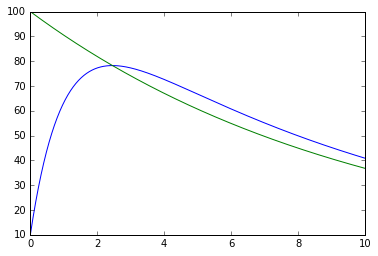

In [12]:
pl.plot(res['t'], res['x'])

In [13]:
ss = ac.linearize()
ss[0]

matrix([[-1. ,  1. ],
        [ 0. , -0.1]])

In [14]:
ac.linearize_symbolic()

(Matrix([
 [-1,  1],
 [ 0, -c]]), Matrix(0, 0, []), Matrix(0, 0, []), Matrix(0, 0, []))

In [15]:
pl.matrix(ss[0]).astype(float)

matrix([[-1. ,  1. ],
        [ 0. , -0.1]])